In [1]:
import pandas as pd 

In [2]:
data1 = pd.read_csv('dfCCE21_26.csv') ##cluster2 Band21-highly utilized ##cluster3 Band09-highly utilized
data2 = pd.read_csv('dfUL21_26.csv')  ##cluster2 Band09-highly utilized ##cluster1 Band21-highly utilized
data3 = pd.read_csv('dfDL21_26.csv')  ##cluster1 Band09-highly utilized ##cluster2 Band21-highly utilized

In [3]:
########--->get sites which high utilized in Band09<-----#######
sites1 = [ data1['x'][i] for i in range(0,len(data1)) if data1['cluster_num'][i]==1 ]  
sites2 = [ data2['x'][i] for i in range(0,len(data2)) if data2['cluster_num'][i]==2 ]  
sites3 = [ data3['x'][i] for i in range(0,len(data3)) if data3['cluster_num'][i]==3 ]  


In [4]:
common_sites=list( set(set(sites1).intersection(sites2)).intersection(sites3))

In [7]:
df18=pd.DataFrame()
CCE21_18=[];DL21_18=[];UL21_18=[]

In [8]:
def get_values(data1,data2,data3):
    for i in common_sites:
        for j in range(0,len(data1)):
            if data1['x'][j]==i:
               CCE21_18.append(data1['y'][j])
            if data2['x'][j]==i:  
                DL21_18.append(data2['y'][j])  
            if data3['x'][j]==i:  
                UL21_18.append(data3['y'][j])
    
    df18.insert(0, 'cell_Name', common_sites, True)        
    df18.insert(1, 'CCE21_26', CCE21_18, True)    
    df18.insert(2, 'DL21_26', DL21_18, True)
    df18.insert(3, 'UL21_26', UL21_18, True)           



In [9]:
get_values(data1,data2,data3)

In [10]:
df18.to_csv('High26UtilizedCELLs_Band21.csv',index=False, index_label=False)

In [26]:
ddf=df21.iloc[:,1:7]

In [27]:
from sklearn.cluster import KMeans
wcss = []                    #within-cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(ddf)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

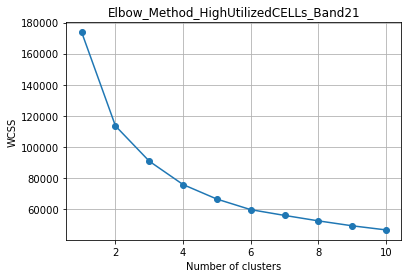

In [38]:
import matplotlib.pyplot as plt
number_of_clusters = range(1,11)
plt.plot(number_of_clusters, wcss, marker='o')
plt.title('Elbow_Method_HighUtilizedCELLs_Band21')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(axis='both')
plt.show()

In [59]:
##clustring
kmeans = KMeans(n_clusters=5).fit(ddf)     
centroids = kmeans.cluster_centers_
df21['cluster_num'] = pd.Series((kmeans.labels_)+1, index=df21.index)

No handles with labels found to put in legend.


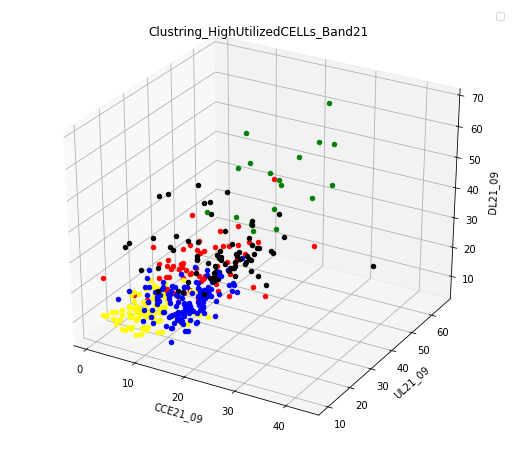

In [62]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating figure
fig = plt.figure(figsize = (9, 8))
ax = plt.axes(projection ="3d")
 
for i in range(0,len(df21)):
    if df21.iloc[i]['cluster_num']==1:
        x = df21.iloc[i]['CCE21_09']
        z = df21.iloc[i]['DL21_09']
        y = df21.iloc[i]['UL21_09']
        ax.scatter3D(x, y, z, color = "red")   

for i in range(0,len(df21)):
    if df21.iloc[i]['cluster_num']==2:
        x = df21.iloc[i]['CCE21_09']
        z = df21.iloc[i]['DL21_09']
        y = df21.iloc[i]['UL21_09']
        ax.scatter3D(x, y, z, color = "blue")     

for i in range(0,len(df21)):
    if df21.iloc[i]['cluster_num']==3:
        x = df21.iloc[i]['CCE21_09']
        z = df21.iloc[i]['DL21_09']
        y = df21.iloc[i]['UL21_09']
        ax.scatter3D(x, y, z, color = "green")   

for i in range(0,len(df21)):
    if df21.iloc[i]['cluster_num']==4:
        x = df21.iloc[i]['CCE21_09']
        z = df21.iloc[i]['DL21_09']
        y = df21.iloc[i]['UL21_09']
        ax.scatter3D(x, y, z, color = "yellow")  

for i in range(0,len(df21)):
    if df21.iloc[i]['cluster_num']==5:
        x = df21.iloc[i]['CCE21_09']
        z = df21.iloc[i]['DL21_09']
        y = df21.iloc[i]['UL21_09']
        ax.scatter3D(x, y, z, color = "black")                

# Creating plot
plt.title("Clustring_HighUtilizedCELLs_Band21")
ax.set_xlabel('CCE21_09')
ax.set_zlabel('DL21_09')
ax.set_ylabel('UL21_09')
plt.legend()
# show plot
plt.show()

In [61]:
centroids = kmeans.cluster_centers_
for i in range(kmeans.n_clusters):
    print(centroids[i])

[10.64975692 31.85848923 17.74191538 10.07786615 18.02329385 34.04787538]
[ 8.48197259 13.31812296 10.15753926 15.50112148 19.60724    16.2291237 ]
[16.89432778 33.58782778 38.01195    23.83021667 49.75433333 38.60905556]
[ 6.98230935 17.85761589  9.74541869  6.90033925 10.77924673 19.34611121]
[12.75268267 19.14434    21.30268933 19.25863067 32.44181867 23.177132  ]


In [46]:
from numpy import where
num_Of_Values_in_Cluster = [] 
for i in range(kmeans.n_clusters):
    num_Of_Values_in_Cluster.append(len(where(kmeans.labels_ == i)[0]))
num_Of_Values_in_Cluster

[63, 77, 20, 106, 134]

In [7]:
###################################################
data11 = pd.read_csv('HighUtilizedCELLs_Band21.csv') 
data12 = pd.read_csv('High09UtilizedCELLs_Band21.csv') 
data13 = pd.read_csv('High26UtilizedCELLs_Band21.csv')  

In [8]:
data11.drop(['cluster_num'],axis=1,inplace=True)

In [9]:
sites11 = [ data11['cell_Name'][i] for i in range(0,len(data11))]  
sites12 = [ data12['cell_Name'][i] for i in range(0,len(data12))]  
sites13 = [ data13['cell_Name'][i] for i in range(0,len(data13))]  

In [10]:
commonsites2=list( set(sites11).intersection(sites12) )

In [11]:
df21=pd.DataFrame()
CCE21_18=[];DL21_18=[];UL21_18=[]
CCE21_09=[];DL21_09=[];UL21_09=[]
# CCE21_26=[];DL21_26=[];UL21_26=[]

In [12]:
def get_values2(data11,data12,data13):
    for i in commonsites2:
        for j in range(0,len(data11)):
            if data11['cell_Name'][j]==i:
               CCE21_18.append(data11['CCE21_18'][j])
               DL21_18.append(data11['DL21_18'][j])
               UL21_18.append(data11['UL21_18'][j])

        for j in range(0,len(data12)):
            if data12['cell_Name'][j]==i:
               CCE21_09.append(data12['CCE21_09'][j])
               DL21_09.append(data12['DL21_09'][j])
               UL21_09.append(data12['UL21_09'][j])

        # for j in range(0,len(data13)):
        #     if data13['cell_Name'][j]==i:
        #        CCE21_26.append(data13['CCE21_26'][j])
        #        DL21_26.append(data13['DL21_26'][j])
        #        UL21_26.append(data13['UL21_26'][j])              
            
    df21.insert(0, 'cell_Name', commonsites2, True)  
    df21.insert(1, 'CCE21_18', CCE21_18, True)    
    df21.insert(2, 'DL21_18', DL21_18, True)
    df21.insert(3, 'UL21_18', UL21_18, True)
    df21.insert(4, 'CCE21_09', CCE21_09, True)    
    df21.insert(5, 'DL21_09', DL21_09, True)
    df21.insert(6, 'UL21_09', UL21_09, True)      
    # df21.insert(7, 'CCE21_26', CCE21_26, True)    
    # df21.insert(8, 'DL21_26', DL21_26, True)
    # df21.insert(9, 'UL21_26', UL21_26, True)           

In [13]:
get_values2(data11,data12,data13)

In [63]:
df21.to_csv('common18_09HighUtilizedCELLs_Band21.csv',index=False, index_label=False)

In [16]:
df21[df21.columns[0]]

0      Site3437_2
1      Site1167_3
2      Site2962_3
3      Site2646_3
4      Site3565_3
          ...    
395    Site2367_3
396    Site2092_2
397    Site3429_1
398    Site3593_2
399    Site2292_1
Name: cell_Name, Length: 400, dtype: object

In [24]:
dictionary={}


In [27]:
import numpy as np

In [33]:
np.expand_dims(df21[df21.columns[1]],axis=0).shape

(1, 400)

In [35]:
from sklearn.decomposition import PCA #n_components=0.95 means it will return the Eigenvectors that have the 95% of the variation in the dataset
for i in range (1,7): 
    pca = PCA(n_components=0.95) 
    dictionary[df21.columns[i]]= pca.fit_transform(np.expand_dims(df21[df21.columns[i]],axis=0))

D:\anaconda\lib\site-packages\sklearn\decomposition\_pca.py:461: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)
D:\anaconda\lib\site-packages\sklearn\decomposition\_pca.py:461: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)
D:\anaconda\lib\site-packages\sklearn\decomposition\_pca.py:461: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)
D:\anaconda\lib\site-packages\sklearn\decomposition\_pca.py:461: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)
D:\anaconda\lib\site-packages\sklearn\decomposition\_pca.py:461: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)
D:\anaconda\lib\site-packages\sklearn\decomposition\_pca.py:461: RuntimeWarning: invalid value encountered in true_divide
  explained_v